# [Exercise 0](https://github.com/kokchun/Deep-learning-AI21/blob/main/Exercises/E0-MLP.ipynb)

In [23]:
import seaborn
import pandas
from tensorflow.keras.backend import clear_session

# 0

## a)

In [24]:
mpg_dataframe = seaborn.load_dataset('mpg').drop('name', axis=1)
mpg_dataframe.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


## b)

In [25]:
mpg_dataframe.describe().T.drop(columns=['count']).sort_index()

,mean,std,min,25%,50%,75%,max
acceleration,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
cylinders,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
model_year,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
weight,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0


In [26]:
mpg_dataframe['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [27]:
mpg_dummies_to_many_categories = pandas.get_dummies(mpg_dataframe, columns=['model_year'], drop_first=True)
mpg_dummies_to_many_categories

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
0,18.0,8,307.0,130.0,3504,12.0,usa,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,usa,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,usa,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,usa,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,usa,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,usa,0,0,0,0,0,0,0,0,0,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,europe,0,0,0,0,0,0,0,0,0,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,usa,0,0,0,0,0,0,0,0,0,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,usa,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
bins = pandas.IntervalIndex.from_tuples([(69,73), (74,77), (78,82)])
mpg_new_model_year = mpg_dataframe.drop(columns='model_year').join(pandas.cut(mpg_dataframe['model_year'], bins=bins))
mpg_new_model_year.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,model_year
0,18.0,8,307.0,130.0,3504,12.0,usa,"(69, 73]"
1,15.0,8,350.0,165.0,3693,11.5,usa,"(69, 73]"
2,18.0,8,318.0,150.0,3436,11.0,usa,"(69, 73]"
3,16.0,8,304.0,150.0,3433,12.0,usa,"(69, 73]"
4,17.0,8,302.0,140.0,3449,10.5,usa,"(69, 73]"


In [29]:
mpg_dummies = pandas.get_dummies(mpg_new_model_year, columns=['model_year', 'origin'], drop_first=True)
mpg_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,"model_year_(74, 77]","model_year_(78, 82]",origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,0,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,0,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,0,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,0,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,0,1,0,1
394,44.0,4,97.0,52.0,2130,24.6,0,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,0,1,0,1
396,28.0,4,120.0,79.0,2625,18.6,0,1,0,1


## c)

In [30]:
mpg_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mpg                  398 non-null    float64
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   model_year_(74, 77]  398 non-null    uint8  
 7   model_year_(78, 82]  398 non-null    uint8  
 8   origin_japan         398 non-null    uint8  
 9   origin_usa           398 non-null    uint8  
dtypes: float64(4), int64(2), uint8(4)
memory usage: 20.3 KB


In [31]:
mpg_dummies.query('horsepower.isna()')

,mpg,cylinders,displacement,horsepower,weight,acceleration,"model_year_(74, 77]","model_year_(78, 82]",origin_japan,origin_usa
32,25.0,4,98.0,NaN,2046,19.0,0,0,0,1
126,21.0,6,200.0,NaN,2875,17.0,0,0,0,1
330,40.9,4,85.0,NaN,1835,17.3,0,1,0,0
336,23.6,4,140.0,NaN,2905,14.3,0,1,0,1
354,34.5,4,100.0,NaN,2320,15.8,0,1,0,0
374,23.0,4,151.0,NaN,3035,20.5,0,1,0,1


In [32]:
X, y = mpg_dummies.drop(columns=['mpg']).values, mpg_dummies['mpg'].values

[Sklearn imputation explained](https://www.youtube.com/watch?v=m_qKhnaYZlc)

In [33]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iterative_imputer = IterativeImputer()
imputed_X_regressively = iterative_imputer.fit_transform(X)
pandas.DataFrame(imputed_X_regressively).iloc[[32,126,330,336,354,374]]

,0,1,2,3,4,5,6,7,8
32,4.0,98.0,57.624810,2046.0,19.0,0.0,0.0,0.0,1.0
126,6.0,200.0,95.401448,2875.0,17.0,0.0,0.0,0.0,1.0
330,4.0,85.0,59.257121,1835.0,17.3,0.0,1.0,0.0,0.0
336,4.0,140.0,98.419123,2905.0,14.3,0.0,1.0,0.0,1.0
354,4.0,100.0,78.641263,2320.0,15.8,0.0,1.0,0.0,0.0
374,4.0,151.0,75.509170,3035.0,20.5,0.0,1.0,0.0,1.0


In [34]:
from sklearn.impute import KNNImputer

KNN_imputer = KNNImputer(n_neighbors=2)
imputed_X_near_neighbour = KNN_imputer.fit_transform(X)
pandas.DataFrame(imputed_X_near_neighbour).iloc[[32,126,330,336,354,374]]

,0,1,2,3,4,5,6,7,8
32,4.0,98.0,66.5,2046.0,19.0,0.0,0.0,0.0,1.0
126,6.0,200.0,105.5,2875.0,17.0,0.0,0.0,0.0,1.0
330,4.0,85.0,60.0,1835.0,17.3,0.0,1.0,0.0,0.0
336,4.0,140.0,104.0,2905.0,14.3,0.0,1.0,0.0,1.0
354,4.0,100.0,63.0,2320.0,15.8,0.0,1.0,0.0,0.0
374,4.0,151.0,85.5,3035.0,20.5,0.0,1.0,0.0,1.0


## d)

## e)

In [35]:
from model_selection import create_train_test_eval_split

full_split, eval_split = create_train_test_eval_split(imputed_X_near_neighbour, y, test_size=0.1)

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import SGD

In [37]:
model_1 = Sequential(name='model_1')
model_1.add(InputLayer(imputed_X_near_neighbour.shape[1]))
model_1.add(Dense(1, name='output_layer'))
model_1.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=.01))
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output_layer (Dense)        (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
standard_scaled_X_train = standard_scaler.fit_transform(eval_split['X_train'])
standard_scaled_X_test = standard_scaler.transform(eval_split['X_test'])

minmax_scaler = MinMaxScaler()
minmax_scaled_X_train = minmax_scaler.fit_transform(eval_split['X_train'])
minmax_scaled_X_test = minmax_scaler.transform(eval_split['X_test'])

In [39]:
model_1.fit(
    standard_scaled_X_train,
    eval_split["y_train"],
    epochs=25,
    validation_data=(standard_scaled_X_test, eval_split["y_test"]),
    verbose=0,
    
)
model_1_loss_df = pandas.DataFrame(model_1.history.history)
model_1_loss_df.index = range(1, len(model_1_loss_df)+1)
model_1_loss_df.head()

,loss,val_loss
1,530.663635,430.288544
2,376.372711,315.967651
3,273.583557,234.432358
4,200.515717,173.433426
5,148.754517,129.545181


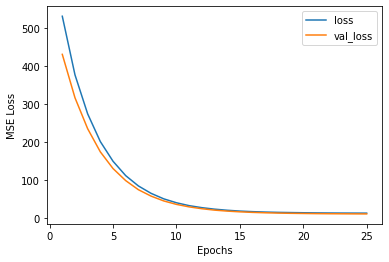

In [40]:
model_1_loss_df.plot(xlabel='Epochs', ylabel='MSE Loss');

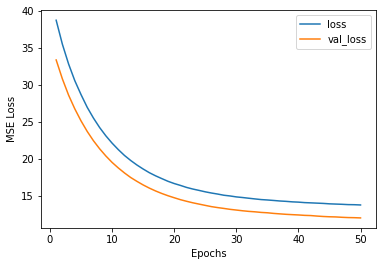

In [41]:
clear_session()
model_1.fit(
    minmax_scaled_X_train,
    eval_split["y_train"],
    epochs=50,
    validation_data=(minmax_scaled_X_test, eval_split["y_test"]),
    verbose=0
)

model_1_loss_df_2 = pandas.DataFrame(model_1.history.history)
model_1_loss_df_2.index = range(1, len(model_1_loss_df_2)+1)
model_1_loss_df_2.plot(xlabel='Epochs', ylabel='MSE Loss');

## f)